<font size=10><b>Data Preprocessing - Assignment I
</b></font>

## <div class="alert alert-info"><b>NOTE:</b> You need to generate a report - write the logic behind every step you take, give your conclusions in a paragraph, and make everything very readable.</div>

# Exercise:

In this exercise, we will look at listings of Airbnb in Amsterdam, trying to predict the `price` of each listing by it's characteristics

<div class="alert alert-info"><b>NOTE:</b> There is no Data dictionary available for this data, but the column names can help you understand or assume the meaning of the features</div>


## Part I:

### 1. Download and extract the `listings.csv` data attached to this exercise.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [2]:
# your code here

df = pd.read_csv('listings.csv')


<ipython-input-2-7f3731a2254e>:3: DtypeWarning: Columns (94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('listings.csv')


### 2. Take a subset using only the following columns: `['listing_url', 'name', 'summary', 'space', 'host_name', 'host_since', 'host_response_rate', 'host_identity_verified', 'city', 'state', 'country', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']`


In [3]:
# your code here
subset = ['listing_url', 'name', 'summary', 'space', 'host_name', 'host_since', 'host_response_rate', 'host_identity_verified', 'city', 'state', 'country', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']
df = df[subset]

 ### 3. Look at the data and define - which are your categorical nominal features, categorical ordinal features and which are your numeric continuous features and numerical discrete? Write a list of each. You can also include a list for ID/date type features

categorical nominal features : listing_url,name,host_name,summary,space,city,state,country,property_type

categorical ordinal features : host_since,host_identity_verified,room_type,bed_type,amenities

numerical discrete features : bathrooms,bedrooms,beds, review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication, review_scores_location,review_scores_value, accomodates

numerical continuous features : host_response_rate,latitude,longitude,square_feet,price,number_of_reviews,review_scores_rating

### 4. Split the data to train and test randomly (no need for a dev set at the moment).


In [4]:
# your code here
target = 'price'
subset = set(subset) - {target}
X = df[subset]
y = df[target]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

<ipython-input-4-e7f9bf043ac7>:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X = df[subset]


### 5. Take the following features: `'city', 'review_scores_rating', 'review_scores_cleanliness', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'number_of_reviews', 'bed_type', 'host_response_rate'`, **and work with them alone for the continuation of the exercise**.


In [5]:
# your code here
new_subset = {'city', 'review_scores_rating', 'review_scores_cleanliness', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'number_of_reviews', 'bed_type', 'host_response_rate'}
X_train = X_train[new_subset]
X_test = X_test[new_subset]


<ipython-input-5-6b5c523a9013>:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_train = X_train[new_subset]
<ipython-input-5-6b5c523a9013>:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_test = X_test[new_subset]


 ### 6. Perform EDA on the **train** dataset - print the summary statistics and contents of each column, plot the distributions of each feature, plot the relationship between all of the features, as well as on the relations of all of the features with the dependent variable. **No need to add new features. Leave only interesting plots.**.


In [6]:
# your code here
X_train.describe(include = 'all')


,number_of_reviews,bathrooms,bedrooms,review_scores_rating,bed_type,room_type,accommodates,review_scores_cleanliness,host_response_rate,property_type,city
count,13733.000000,13730.000000,13727.000000,12031.000000,13733,13733,13733.000000,12028.000000,7990,13733,13731
unique,NaN,NaN,NaN,NaN,5,3,NaN,NaN,67,30,30
top,NaN,NaN,NaN,NaN,Real Bed,Entire home/apt,NaN,NaN,100%,Apartment,Amsterdam
freq,NaN,NaN,NaN,NaN,13602,10853,NaN,NaN,5877,10572,13530
mean,23.283405,1.136052,1.446638,94.922533,NaN,NaN,2.885240,9.471733,NaN,NaN,NaN
std,47.666299,0.356858,0.891157,6.759875,NaN,NaN,1.327441,0.873251,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,20.000000,NaN,NaN,1.000000,2.000000,NaN,NaN,NaN
25%,3.000000,1.000000,1.000000,93.000000,NaN,NaN,2.000000,9.000000,NaN,NaN,NaN
50%,9.000000,1.000000,1.000000,97.000000,NaN,NaN,2.000000,10.000000,NaN,NaN,NaN
75%,23.000000,1.000000,2.000000,100.000000,NaN,NaN,4.000000,10.000000,NaN,NaN,NaN


In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13733 entries, 14778 to 15795
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   number_of_reviews          13733 non-null  int64  
 1   bathrooms                  13730 non-null  float64
 2   bedrooms                   13727 non-null  float64
 3   review_scores_rating       12031 non-null  float64
 4   bed_type                   13733 non-null  object 
 5   room_type                  13733 non-null  object 
 6   accommodates               13733 non-null  int64  
 7   review_scores_cleanliness  12028 non-null  float64
 8   host_response_rate         7990 non-null   object 
 9   property_type              13733 non-null  object 
 10  city                       13731 non-null  object 
dtypes: float64(4), int64(2), object(5)
memory usage: 1.3+ MB


In [8]:
X_train.columns

Index(['number_of_reviews', 'bathrooms', 'bedrooms', 'review_scores_rating',
       'bed_type', 'room_type', 'accommodates', 'review_scores_cleanliness',
       'host_response_rate', 'property_type', 'city'],
      dtype='object')

In [9]:
y_train_numerical = y_train.str.replace('$','').str.replace(',','').astype(float)
numeric_hrr = X_train.host_response_rate.str.rstrip('%').astype(float)

<ipython-input-9-06238f97f496>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  y_train_numerical = y_train.str.replace('$','').str.replace(',','').astype(float)


In [10]:
X_train[X_train.host_response_rate.notna()].shape

(7990, 11)

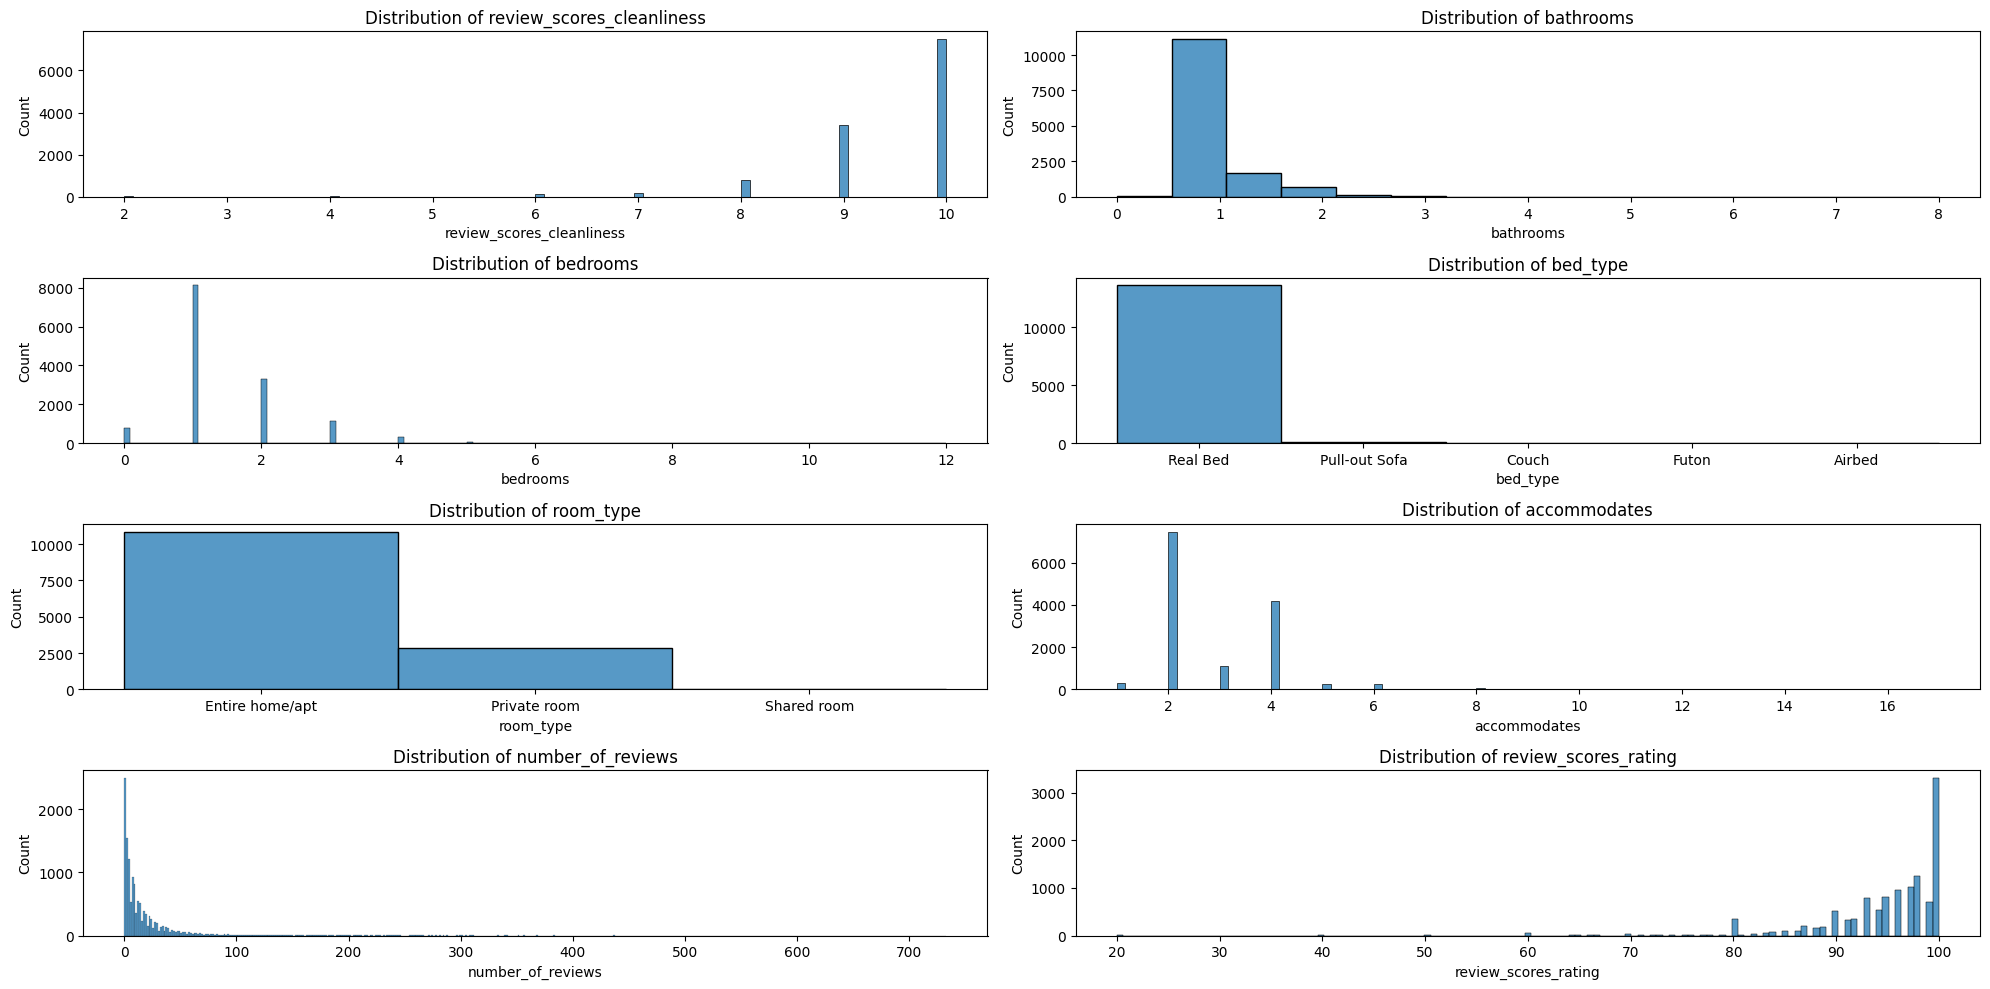

In [11]:
f,axes = plt.subplots(4,2, figsize = (20,10))
axes = axes.flatten()
features_to_plot = new_subset - {'property_type','host_response_rate','city'}
for index,columns in enumerate(features_to_plot):
  sns.histplot(x = X_train[columns], ax = axes[index])
  axes[index].set_title(f'Distribution of {columns}')

plt.tight_layout()
plt.show()


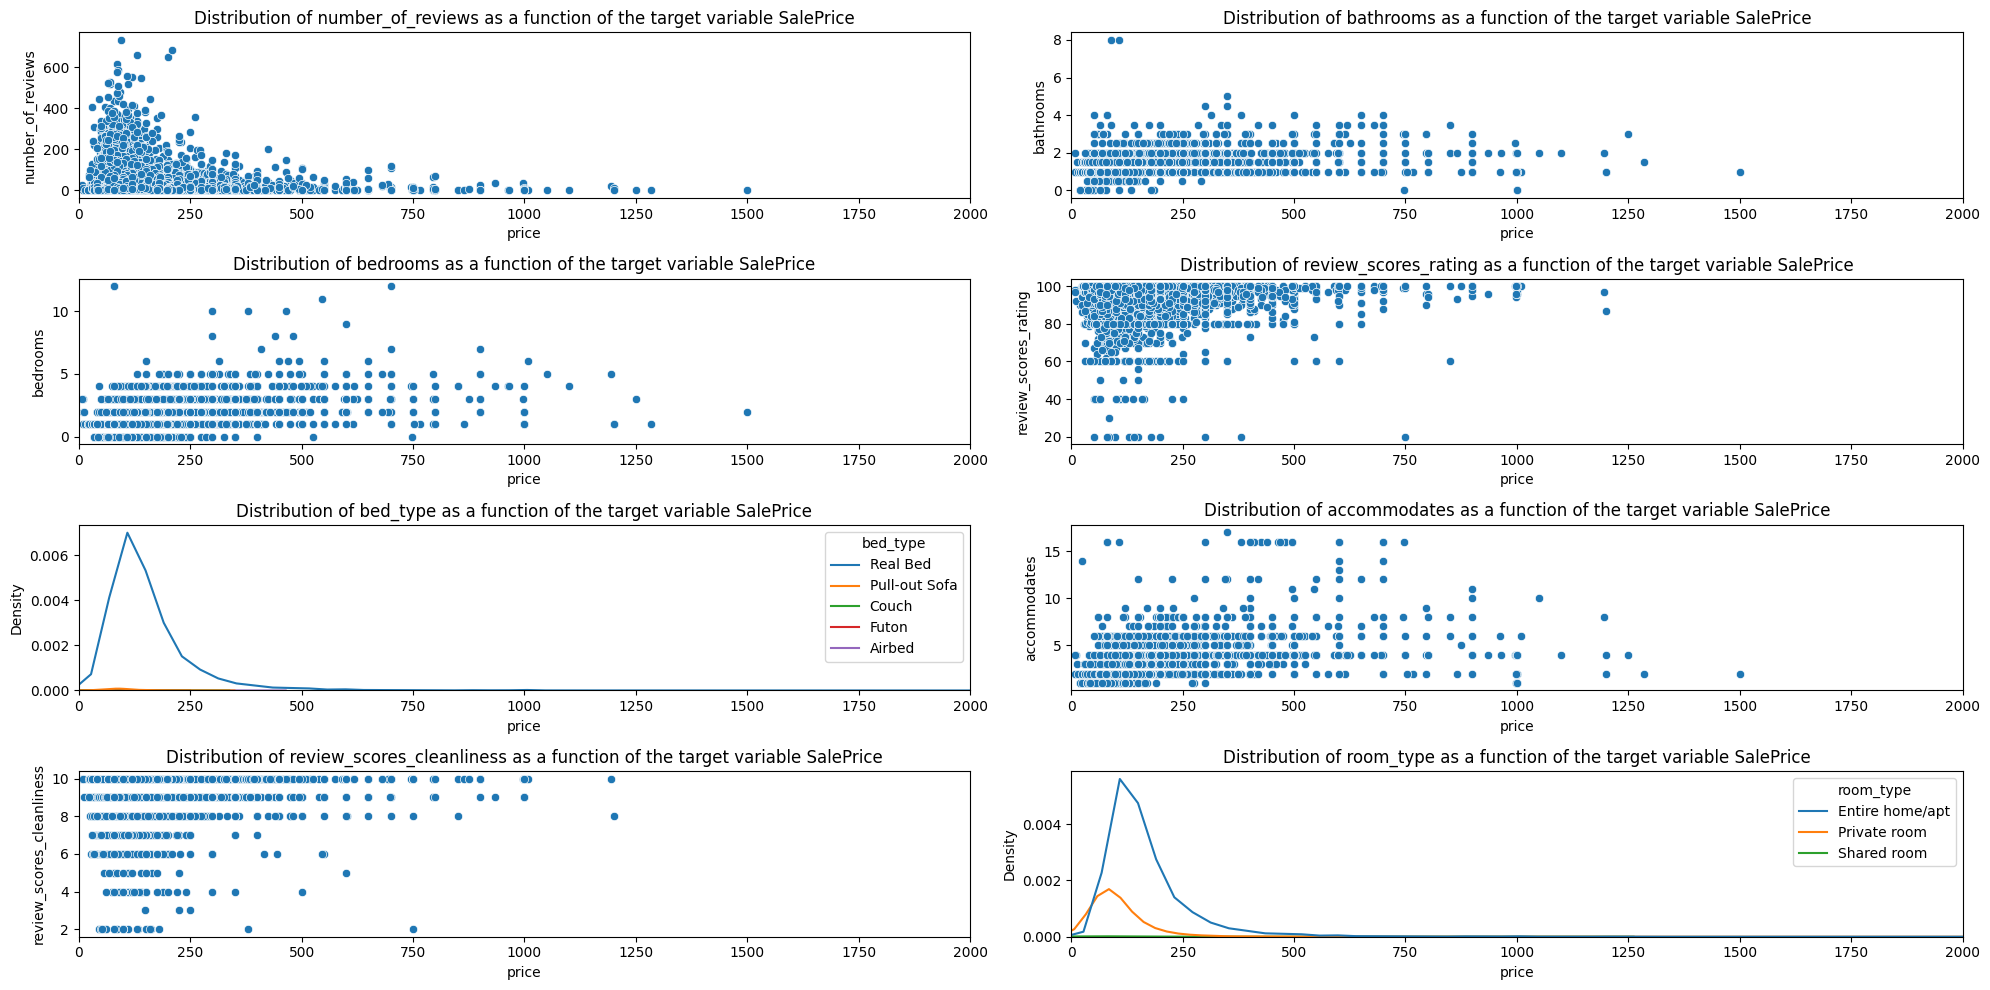

In [12]:
cat_features = {'bed_type','room_type'}
num_features = features_to_plot - cat_features
f,axes = plt.subplots(4,2,figsize = (20,10))
axes = axes.flatten()

for index,columns in enumerate(cat_features.union(num_features)):
  if columns in cat_features:
    sns.kdeplot(x = y_train_numerical, hue = X_train[columns], ax = axes[index])
    axes[index].set(title = f'Distribution of {columns} as a function of the target variable SalePrice', xlim = (0,2000))
  else:
    sns.scatterplot(x = y_train_numerical, y = X_train[columns], ax = axes[index])
    axes[index].set(title = f'Distribution of {columns} as a function of the target variable SalePrice', xlim = (0,2000))

plt.tight_layout()
plt.show()


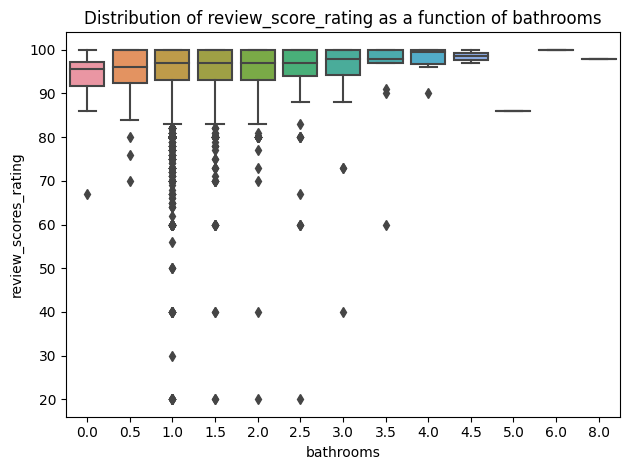

In [13]:
f,axes = plt.subplots(1,1)

sns.boxplot(data = X_train, x = 'bathrooms', y = 'review_scores_rating')
axes.set(title = 'Distribution of review_score_rating as a function of bathrooms', xlabel = 'bathrooms', ylabel = 'review_scores_rating')

plt.tight_layout()
plt.show()

### 7. Remove columns that are redundant / are not important / are duplicated / are correlated - explain why you selected the features that way.

<ipython-input-14-e90dbe47e734>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train_corr = X_train.corr(method = 'spearman')


<Axes: >

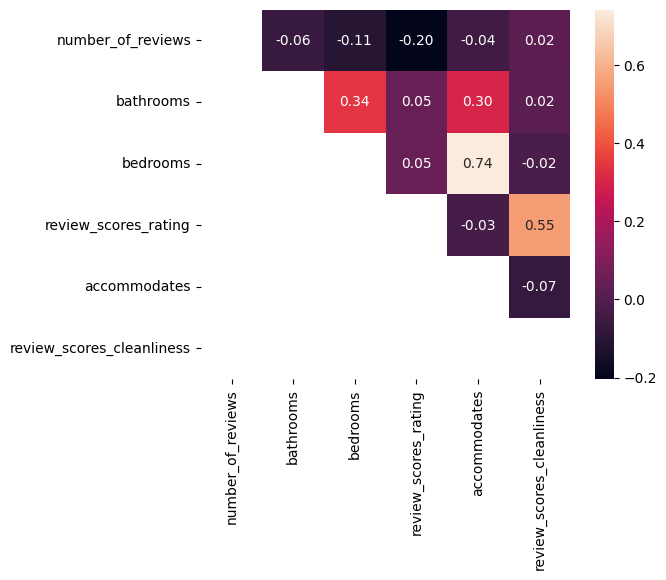

In [14]:
X_train_corr = X_train.corr(method = 'spearman')
mask = np.tril(np.ones_like(X_train_corr,dtype = bool))
sns.heatmap(X_train_corr,annot = True, fmt = '.2f', mask = mask, square = True)

We have a very strong correlation between accomodates and bedrooms. As accomodates includes bedrooms, we can drop the column bedrooms.


We also have a strong correlation between bathrooms and accomodates and between bathrooms and bedrooms so we can drop the column bathrooms.

We can also remove the column room_type because it does not give a lot of informations.

In [15]:
# your code here
X_train.drop(columns = ['bedrooms','bathrooms','room_type'],inplace = True)
X_test.drop(columns = ['bedrooms','bathrooms','room_type'],inplace = True)

## Part II:
   
**On your train set alone**

### 8. Transform your categorical features - explain what your considerations were with regards to which method you chose.


In [16]:
# your code here
nominal_features = ['city', 'bed_type', 'property_type']
encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
encoder.fit(X_train[nominal_features])
encoder.transform(X_train[nominal_features])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
train_encoder_df = pd.DataFrame(encoder.transform(X_train[nominal_features]), columns = encoder.get_feature_names_out(nominal_features), index = X_train.index)
X_train = pd.concat([X_train,train_encoder_df],axis = 1).drop(columns = nominal_features)

### 9. What is the data shape after the transformation?


In [18]:
# your code here
X_train.shape # (10576, 60)

(13733, 71)

 ### 10. Look at the distribution (sample count per unique value) of all the new features that were added / transformed by you - What can we say about it? Can you spot any redundant features (features with very low cardinality or super un-even distribution, long tail)? Show it.


In [19]:
# your code here
redundant_features = []
for columns in train_encoder_df.columns:
  if (X_train[columns].value_counts()[1]/X_train[columns].value_counts()[0]*100) < 1: # There is less than 1% of '1' values in the feature
    redundant_features.append(columns)
print(redundant_features)




['city_1015 SN Amsterdam', 'city_AMSTERDAM', 'city_Amstelveen', 'city_Amsterdam ', 'city_Amsterdam (Zunderdorp)', 'city_Amsterdam Zuid-Oost', 'city_Amsterdam Zuidoost', 'city_Amsterdam, Noord-Holland, NL', 'city_Amsterdam-Zuidoost', 'city_Badhoevedorp', 'city_Central Amsterdam', 'city_De Pijp', 'city_Diemen', 'city_Duivendrecht', 'city_Halfweg', 'city_Jordaan', 'city_Jordaan, Amsterdam', 'city_Landsmeer', 'city_Lijnden', 'city_Nederland', 'city_North Amsterdam', 'city_Oostzaan', 'city_Watergraafsmeer', 'city_Zeeburg', 'city_Zeeburgerkade', 'city_Zuiderwoude', 'city_amsterdam', 'city_Амстердам', 'city_阿姆斯特丹', 'city_nan', 'bed_type_Airbed', 'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull-out Sofa', 'property_type_Aparthotel', 'property_type_Barn', 'property_type_Boutique hotel', 'property_type_Bungalow', 'property_type_Cabin', 'property_type_Camper/RV', 'property_type_Campsite', 'property_type_Casa particular (Cuba)', 'property_type_Chalet', 'property_type_Cottage', 'property_type_Dom

The features we got have a very low cardinality.

There is less than 1% of values = 1 in the feature.

 11. Take care of the redundant features you mentioned in previous question, and explain your steps.


In [20]:
# your code here
city_features = [feature for feature in redundant_features if 'city' in feature]
bed_type_features = [feature for feature in redundant_features if 'bed_type' in feature]
property_type_features = [feature for feature in redundant_features if 'property_type' in feature]

X_train['city_other']= X_train[city_features].sum(axis=1)
X_train['bed_type_other'] = X_train[bed_type_features].sum(axis = 1)
X_train['property_type_other'] = X_train[property_type_features].sum(axis=1)

X_train.drop(columns = city_features + bed_type_features + property_type_features ,inplace = True)


**On your test set**
 12. Transform the categorical features in the test set, according to the train set. Make sure the test set now has no more and  no less features than the train set, and that they match in name.

In [21]:
# your code here
test_encoder_df = pd.DataFrame(encoder.transform(X_test[nominal_features]), columns = encoder.get_feature_names_out(nominal_features), index = X_test.index)
X_test = pd.concat([X_test,test_encoder_df],axis = 1).drop(columns = nominal_features)
X_test['city_other']= X_test[city_features].sum(axis=1)
X_test['bed_type_other'] = X_test[bed_type_features].sum(axis = 1)
X_test['property_type_other'] = X_test[property_type_features].sum(axis=1)

X_test.drop(columns = city_features + bed_type_features + property_type_features ,inplace = True)

In [22]:
for column_train,column_test in zip(X_train.columns,X_test.columns):
  assert column_train == column_test

## Part III:

**On your train set alone**

### 13. Transform your numeric features according to the 3 methods: normalization, binning and transformations (choose different features for each method)


In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import KBinsDiscretizer

num_features = number_of_reviews, review_scores_cleanliness, review_scores_rating, accommodates

In [24]:
# Transformation of number_of_reviews

scaler = StandardScaler()
scaler.fit(X_train.number_of_reviews[:,None])
X_train.number_of_reviews = scaler.transform(X_train.number_of_reviews[:,None])


<ipython-input-24-b794e83662ff>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  scaler.fit(X_train.number_of_reviews[:,None])
<ipython-input-24-b794e83662ff>:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train.number_of_reviews = scaler.transform(X_train.number_of_reviews[:,None])


In [25]:
X_train.review_scores_rating.fillna(X_train.review_scores_rating.mean(), inplace = True)
X_test.review_scores_rating.fillna(X_train.review_scores_rating.mean(), inplace = True)

(array([1.300e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.400e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 5.700e+01, 0.000e+00, 1.000e+00, 0.000e+00, 3.000e+00,
        4.000e+00, 2.000e+00, 8.000e+00, 1.000e+00, 1.000e+00, 2.700e+01,
        6.000e+00, 6.000e+00, 2.000e+0

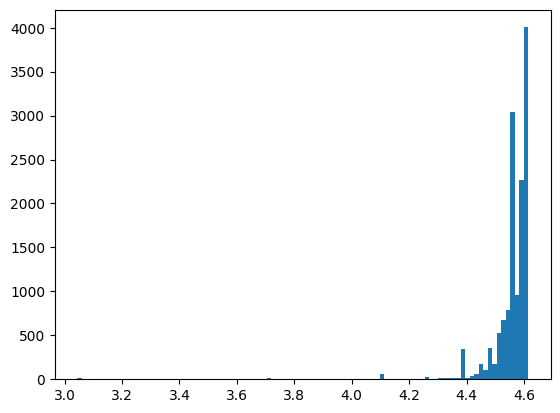

In [26]:
# Transformation of review_scores_rating

transformer = FunctionTransformer(np.log1p, validate = True)
X_train['review_scores_rating'] = transformer.transform(X_train[['review_scores_rating']].values)
plt.hist(X_train['review_scores_rating'], bins = 100)


In [27]:
X_train.review_scores_cleanliness.fillna(X_train.review_scores_cleanliness.mean(),inplace = True)
X_test.review_scores_cleanliness.fillna(X_train.review_scores_cleanliness.mean(),inplace = True)

In [28]:
# Transformation of review_scores_cleanliness
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
est.fit(X_train[['review_scores_cleanliness']])
X_train['review_scores_cleanliness'] = est.transform(X_train[['review_scores_cleanliness']])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [29]:
# Transformation of accommodates

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train[['accommodates']])
X_train.accommodates = mm_scaler.transform(X_train[['accommodates']])


### 14. Explain the logic behind your choice



I have chosen the standardization for the number_of_reviews feature because we do not have many outliers so the scalling is effective

I have chosen the data transformation for the review_scores_rating because this feature is highly skewed.

I have chosen the bining for the review_scores_cleanliness because we want to discretize the feature as we are only interested in a specific ranges.

I have chosen the min-max scaling for the accommodates feature because we know the range in advance

### 15. Plot the new distributions to check that your transformation worked



<Axes: xlabel='accommodates', ylabel='Count'>

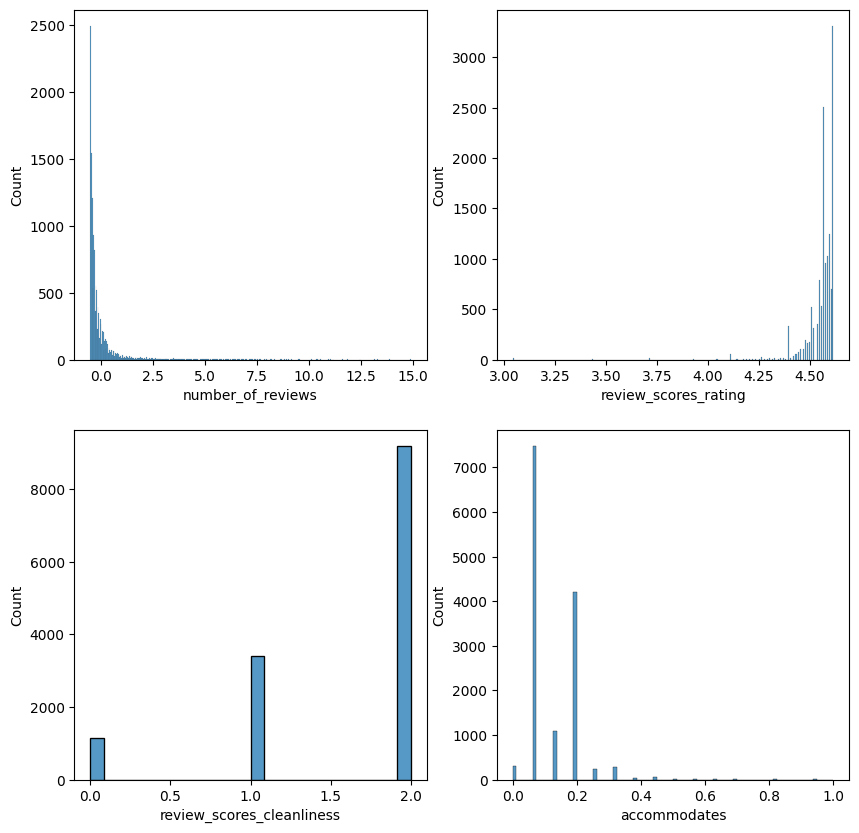

In [30]:
# your code here

f,axes = plt.subplots(2,2,figsize = (10,10))
axes = axes.flatten()
sns.histplot(x = X_train.number_of_reviews, ax = axes[0])
sns.histplot(x = X_train.review_scores_rating, ax = axes[1])
sns.histplot(x = X_train.review_scores_cleanliness, ax = axes[2])
sns.histplot(x = X_train.accommodates, ax = axes[3])


**On your test set**
 16. Transform the numeric features in the test set, according to the train set.

In [31]:
# your code here
X_test.number_of_reviews = scaler.transform(X_test.number_of_reviews[:,None])
X_test.review_scores_rating = transformer.transform(X_test[['review_scores_rating']].values)
X_test.review_scores_cleanliness = est.transform(X_test[['review_scores_cleanliness']])
X_test.accommodates = mm_scaler.transform(X_test[['accommodates']])

<ipython-input-31-5caac486b2f1>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_test.number_of_reviews = scaler.transform(X_test.number_of_reviews[:,None])


In [32]:
X_train.head()

,number_of_reviews,review_scores_rating,accommodates,review_scores_cleanliness,host_response_rate,city_Amsterdam,bed_type_Real Bed,property_type_Apartment,property_type_Bed and breakfast,property_type_Boat,property_type_Condominium,property_type_House,property_type_Houseboat,property_type_Loft,property_type_Townhouse,city_other,bed_type_other,property_type_other
14778,0.036014,4.584967,0.0625,2.0,100%,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11596,-0.383585,4.532599,0.1875,1.0,80%,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
239,1.525590,4.488636,0.2500,0.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5158,-0.299665,4.615121,0.1875,2.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8748,-0.404565,4.615121,0.0625,2.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
